Phyu_ShunLei_Problem (1) and (2)

Problem 1. Breakfast Cereals

(a)

Quantitative/ Numerical Vraiables
-Calories, Protein , Fat, Sodium ,Fiber, Carbo, Potass, Vitamins, Shelf, Weight , Cups, Ratings

Ordinal Variable - Ratings

Norminal Variables - Name, MFR, Type

(b) Computing mean , medium , mode and standard deviation of the quantitavie variables

In [11]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load teh data set
cereal_df = pd.read_csv('cereal (1).csv')

# Display the first 9 rows of the dataset
cereal_df.head(9)

# Check for missing values
print(cereal_df.isnull().sum())  # Summarize missing values by column

# Display the summary statistics for the dataset
cereal_df.describe()


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [12]:
# Compute statistics for three quantitative variables
variables = ['calories', 'protein', 'fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']

for var in variables:
  print(f'Statistics for {var}:')
  print('Mean : ', cereal_df[var].mean())
  print('Median : ', cereal_df[var].median())
  print('Min : ', cereal_df[var].min())
  print('Max : ', cereal_df[var].max())
  print('Std. dev : ', cereal_df[var].std())

Statistics for calories:
Mean :  106.88311688311688
Median :  110.0
Min :  50
Max :  160
Std. dev :  19.48411905682084
Statistics for protein:
Mean :  2.5454545454545454
Median :  3.0
Min :  1
Max :  6
Std. dev :  1.0947897484455338
Statistics for fat:
Mean :  1.0129870129870129
Median :  1.0
Min :  0
Max :  5
Std. dev :  1.0064725594803927
Statistics for sodium:
Mean :  159.67532467532467
Median :  180.0
Min :  0
Max :  320
Std. dev :  83.83229524009317
Statistics for fiber:
Mean :  2.1519480519480516
Median :  2.0
Min :  0.0
Max :  14.0
Std. dev :  2.3833639643872235
Statistics for carbo:
Mean :  14.597402597402597
Median :  14.0
Min :  -1.0
Max :  23.0
Std. dev :  4.278956280325909
Statistics for sugars:
Mean :  6.922077922077922
Median :  7.0
Min :  -1
Max :  15
Std. dev :  4.444885392419359
Statistics for potass:
Mean :  96.07792207792208
Median :  90.0
Min :  -1
Max :  330
Std. dev :  71.28681250926212
Statistics for vitamins:
Mean :  28.246753246753247
Median :  25.0
Min :  0
Ma

(c) Plot a histogram for each of the quantitative variable

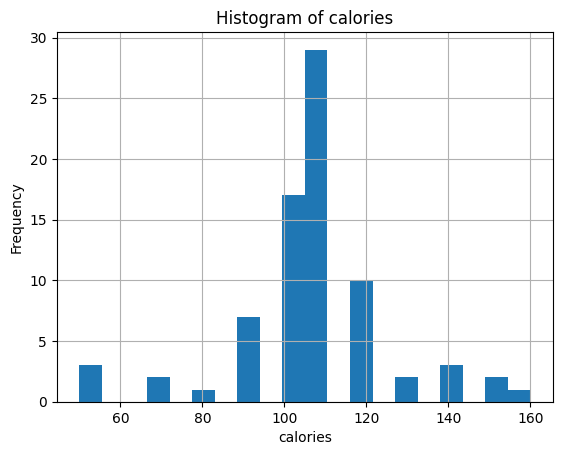

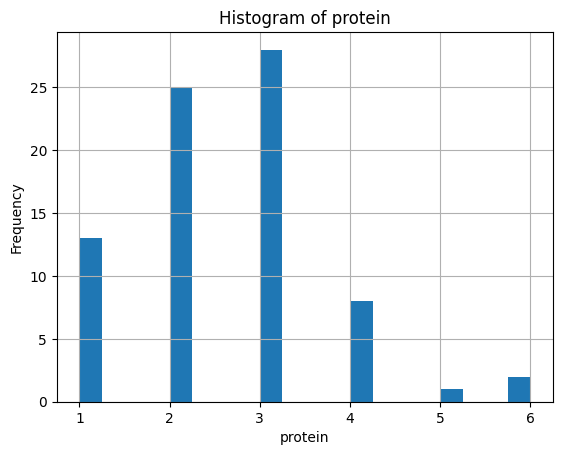

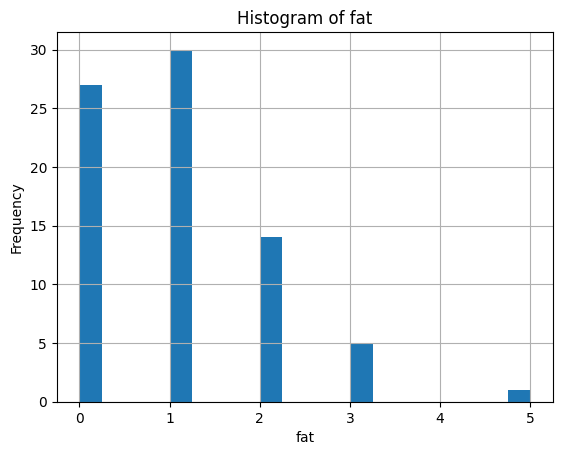

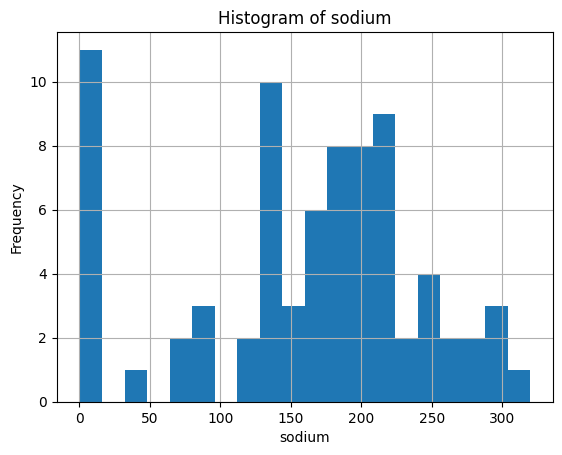

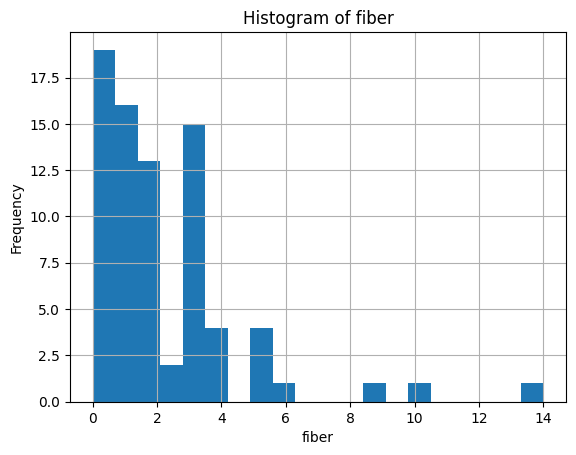

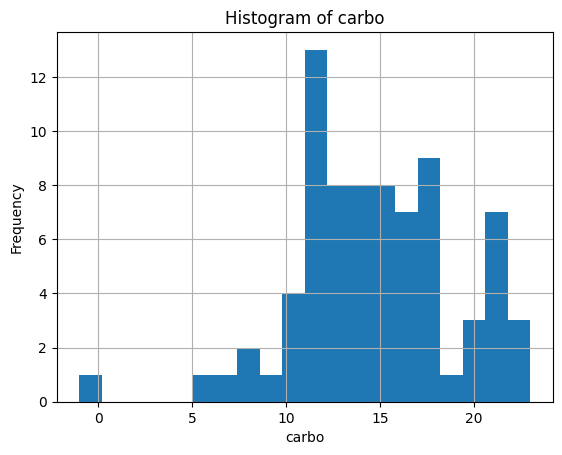

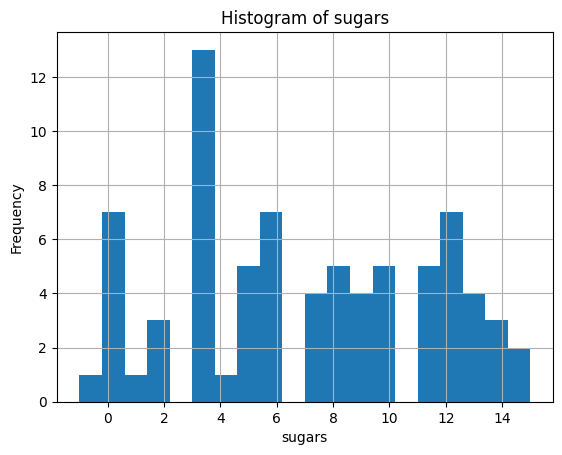

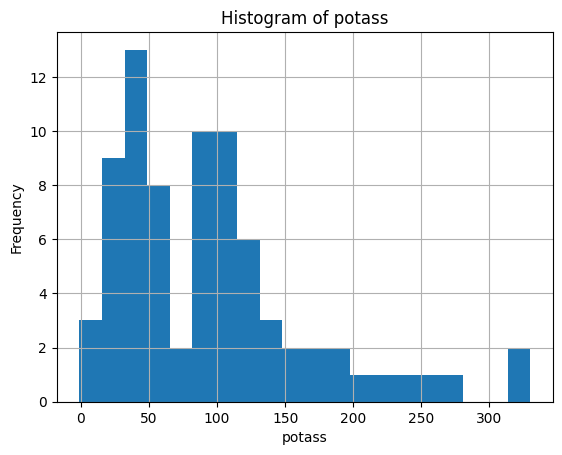

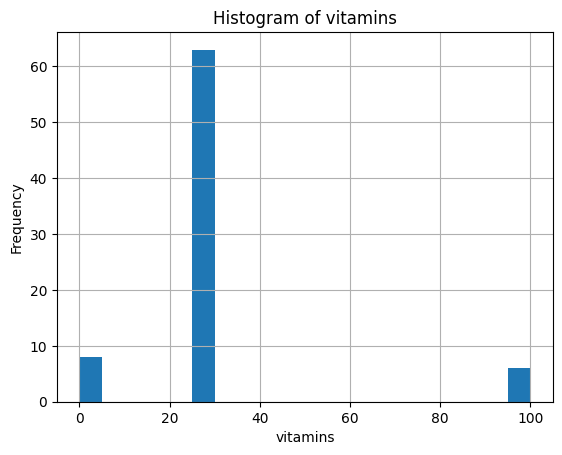

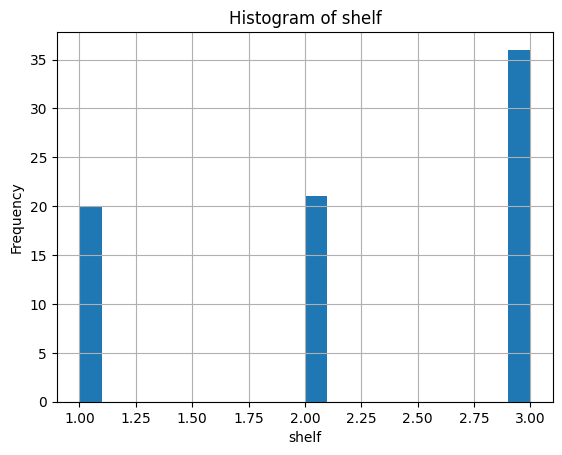

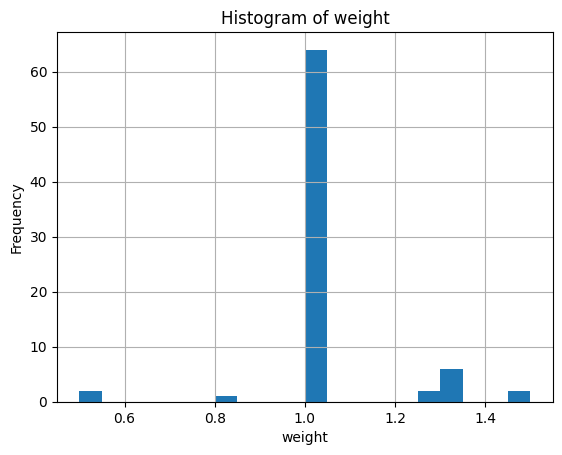

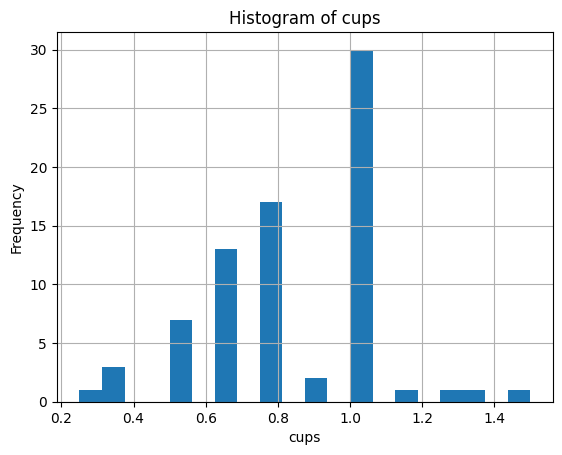

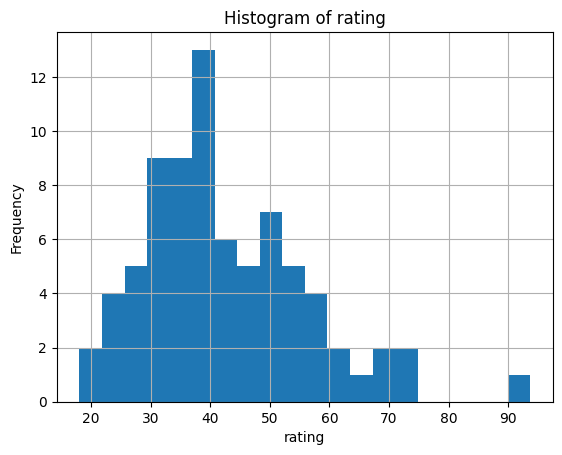

In [13]:
# Plot histograms for each quantitative variable
for var in variables:
    plt.figure()
    cereal_df[var].hist(bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
# Based on the histograms and summary statistics,
# i. Which variables have the largest variability?
variability = cereal_df[variables].std()
print('Variables with the largest variability:')
print(variability.sort_values(ascending=False).head(3))

# ii. Which variables seem skewed?
skewness = cereal_df[variables].skew()
print('Variables that seem skewed:')
print(skewness[skewness.abs() > 1])

# iii. Are there any values that seem extreme?
extreme_values = cereal_df[variables].apply(lambda x: x[(x < (x.mean() - 3 * x.std())) | (x > (x.mean() + 3 * x.std()))])
print('Extreme values:')
print(extreme_values.dropna())

Variables with the largest variability:
sodium      83.832295
potass      71.286813
vitamins    22.342523
dtype: float64
Variables that seem skewed:
fat         1.165989
fiber       2.431675
potass      1.350971
vitamins    2.463704
dtype: float64
Extreme values:
Empty DataFrame
Columns: [calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, rating]
Index: []


(d) Plot a side-by-side boxplot comparing the calories in hot vs cold cereals

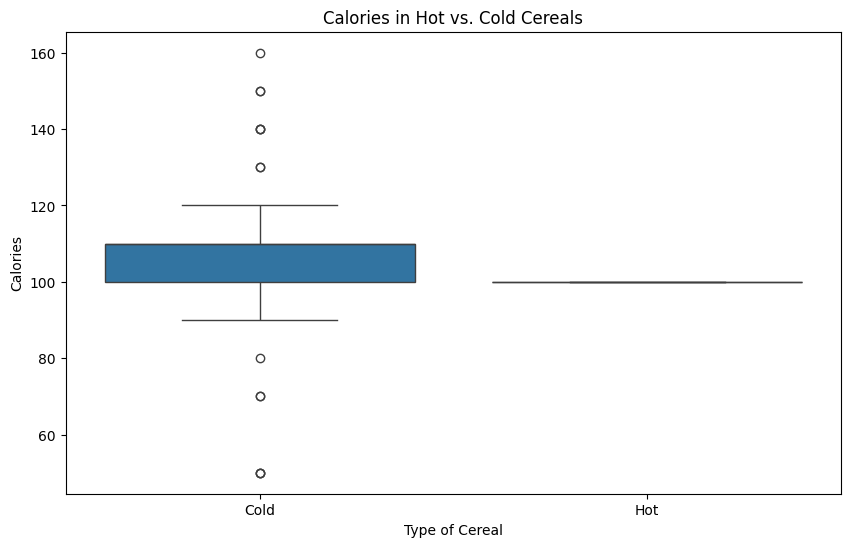

In [16]:
# Create a new column to categorize cereals as Hot or Cold
cereal_df['type'] = cereal_df['type'].apply(lambda x: 'Hot' if x == 'H' else 'Cold')

# Plot the side-by-side boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='calories', data=cereal_df)
plt.title('Calories in Hot vs. Cold Cereals')
plt.xlabel('Type of Cereal')
plt.ylabel('Calories')
plt.show()

The outliers in this box-plot of "Cold Cereals" shows that some creals may have lower or higher calories compared to the standard range.

As there are only 3 hot cereals in the data the reuslt shows a flat distribution instead of  a box. There is no meaningful variability to form a box plot for the 'Hot Cereals'.

( e ) Plot a side-by-side boxplot of consumer rating as a function 202 of the shelf height.

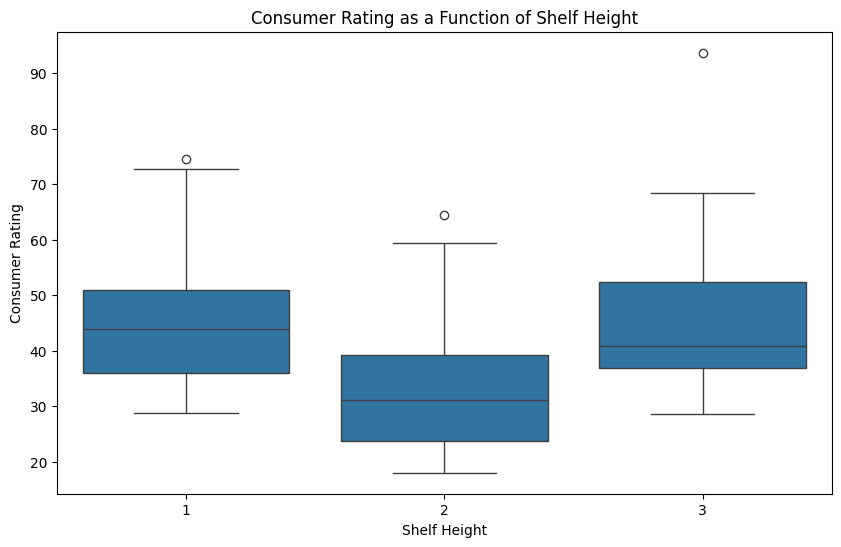

In [17]:
# Plot the side-by-side boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='shelf', y='rating', data=cereal_df)
plt.title('Consumer Rating as a Function of Shelf Height')
plt.xlabel('Shelf Height')
plt.ylabel('Consumer Rating')
plt.show()

There is an overlap in the ranges of consumer ratings between 'shelf height 1' adnd 'shelf height 3',as well as similar median consumer ratings and both are highere than shelf height 2. It is significant that shelf height 2 has the lowest median rating. In addtion to this, all three categories have outlieres.

 In general, shelf height 2 can be considered for removal since it showed significantly lower ratings. However, if the consumar rating is the target variable of the problem domain, it may be worth to keep all three categories despite the overlap, different spread and outliers.

( f ) Compute the correlation table for the quantitative variable (method corr()).

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.250681   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.130864   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.318043   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.355983   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.356083   
carbo     0.250681 -0.130864 -0.318043  0.355983 -0.356083  1.000000   
sugars    0.562340 -0.329142  0.270819  0.101451 -0.141205 -0.331665   
potass   -0.066609  0.549407  0.193279 -0.032603  0.903374 -0.349685   
vitamins  0.265356  0.007335 -0.031156  0.361477 -0.032243  0.258148   
shelf     0.097234  0.133865  0.263691 -0.069719  0.297539 -0.101790   
weight    0.696091  0.216158  0.214625  0.308576  0.247226  0.135136   
cups      0.087200 -0.244469 -0.175892  0.119665 -0.513061  0.363932   
rating   -0.689376  0.470618 -0.409284 -0.401295  0.584160  0.05

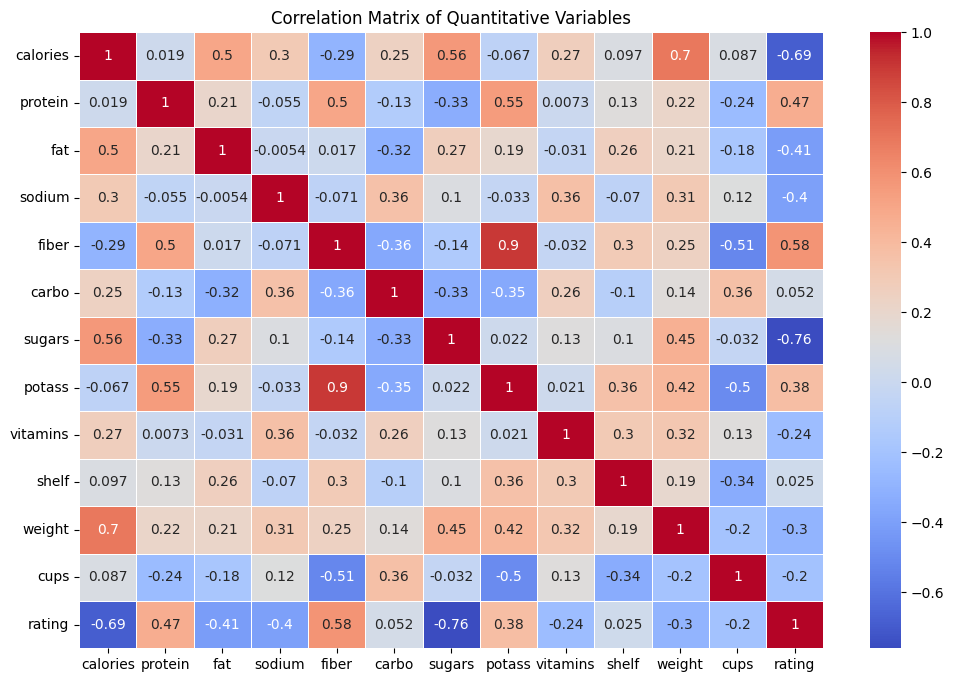

In [ ]:
# Compute the correlation table
# Include only numeric columns for correlation calculation
correlation_table = cereal_df.select_dtypes(include=['number']).corr()
print(correlation_table)

# Generate a matrix plot (heatmap) for the correlation table
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Quantitative Variables')
plt.show()

i. The most strongly correlated pair is Fiber and Potass, with a correlation of (0.9), indicating a very strong positive linear realationship.

ii. Variables with strong significant relationships ; Fiber and Potass(0.9), Calories and Weight (0.7), we can remove one of the variables from these pairs and for Sugar and Ratings (-0.76),as rating might be considered as target variable, Sugar can be kept as a predictor.

iii Normalization,i.e rescaling the data mean=0, standard variation=1), would not change the correlations because the relaive distance between the data points will remain the same.

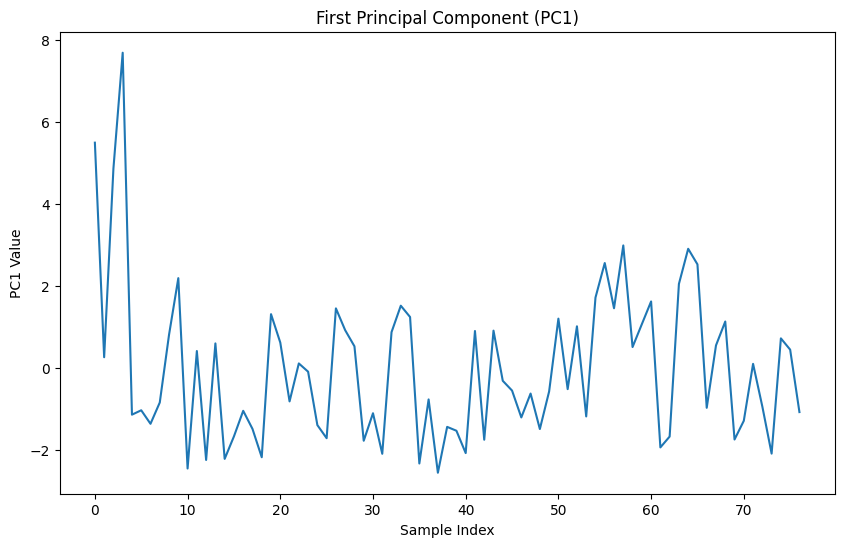

Explained Variance Ratio: [0.27768061]


In [ ]:
from sklearn.decomposition import PCA # Import the PCA class

# Select the 13 numerical variables
numerical_vars = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

# Standardize the data
standardized_data = (cereal_df[numerical_vars] - cereal_df[numerical_vars].mean()) / cereal_df[numerical_vars].std()

# Perform PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1'])

# Add the principal component to the original DataFrame
cereal_df['PC1'] = pc_df

# Plot the first principal component
plt.figure(figsize=(10, 6))
plt.plot(cereal_df['PC1'])
plt.title('First Principal Component (PC1)')
plt.xlabel('Sample Index')
plt.ylabel('PC1 Value')
plt.show()

# Display the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


The PC1 captures 27.77% of the total variance in the dataset.

Problem 2. University Rankings



(a)

In [ ]:
import pandas as pd

# Load the dataset
university_df = pd.read_csv('synthetic_university_data.csv')

# Remove all categorical variables
numerical_df = university_df.select_dtypes(include=['float64', 'int64'])

# Remove all records with missing numerical measurements
cleaned_df = numerical_df.dropna()

# Display the cleaned dataset
print(cleaned_df.head())

# Save the cleaned dataset to a new CSV file
cleaned_df.to_csv('cleaned_university_dataset.csv', index=False)

        Tuition  Graduation_Rate  Acceptance_Rate  Student_Faculty_Ratio  \
0  25599.706537        33.637990        10.010775              17.852386   
1  57289.286853        67.890743        50.890331              12.711707   
2  45259.666800        79.634236        13.748153              19.326055   
3  37926.216631        90.967839        32.093565              13.130280   
4  13581.025224        79.986085        66.558119               5.981735   

   Average_SAT     Endowment  Research_Expenditure  Average_Class_Size  \
0  1495.626937  5.328052e+07          5.178713e+07           39.330113   
1   944.526033  7.830658e+08          2.158109e+08           52.808953   
2  1558.148942  8.456653e+08          1.150362e+08           64.252678   
3   975.017367  7.992831e+08          2.580213e+08           98.739241   
4  1060.976406  5.089706e+08          1.268215e+08           94.398810   

   Alumni_Donations  Campus_Size  
0         50.356807  1301.076210  
1         10.345159  1591.45

( b )

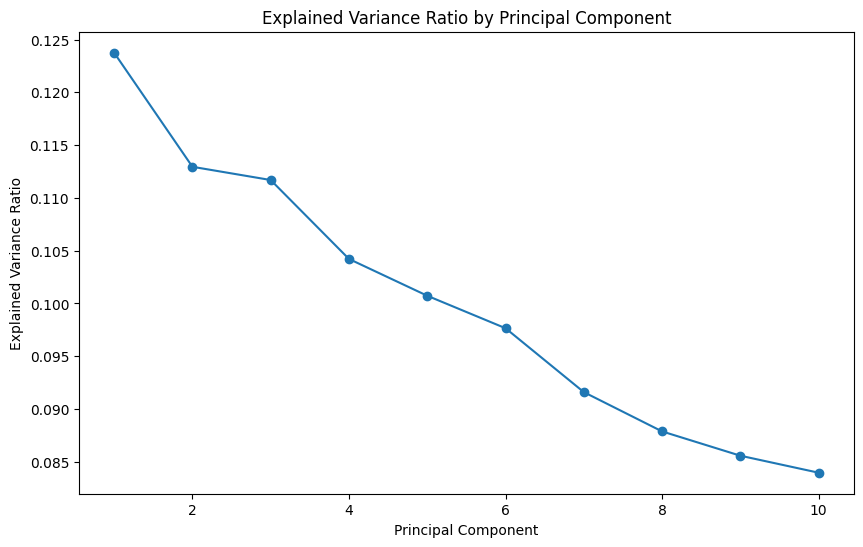

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the data
standardized_data = (cleaned_df - cleaned_df.mean()) / cleaned_df.std()

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Yes,the data should be analyized befrore performing principle component analysis , otherwise, the variables with larger scales could dominate the principle components.

-The key components should have strong realtaionship with target variables and  should have low redundancy, i.e, not be highly correlated with other variables.In addtion to this, they should be more relevant and meaningful to the problem domain.
